# MSDS 7331 - Data Mining

# Assignment 1 - Kickstarter Project Prediction

by: Evangelos Giakoumakis

## Business Understanding - Describe the purpose of the data set you selected:

Kickstarter is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity.The company's stated mission is to "help bring creative projects to life."

It helps people for gathering money from the public, circumvents traditional avenues of investment. Project creators choose a deadline and a minimum funding goal. If the goal is not met by the deadline, no funds are collected (a kind of assurance contract). The platform is open to backers from anywhere in the world.

Kickstarter applies a 5% fee on the total amount of the funds raised. Unlike many forums for fundraising or investment, Kickstarter claims no ownership over the projects and the work they produce. The web pages of projects launched on the site are permanently archived and accessible to the public.

There is no guarantee that people who post projects on Kickstarter will deliver on their projects, use the money to implement their projects, or that the completed projects will meet backers' expectations. That is the purpoe of this project. Use our analytical skills to predict if a project will be a success or a failure.


## Data Understanding - Describe the meaning and type of data for each attribute in the data file:

Our dataset can be found at: https://www.kaggle.com/kemical/kickstarter-projects/data
There are a total of 17 attributes with a total of 323,750 rows. Some of the attributes had no description or missed over 95% of their data so we decided to remove them. A few entries were not formatted correctly so a decision was made to remove them as well. In the end we ended up with 13 usable variables and 319,510 entries. 

Below is a list of all fields, their type and a short description:

Attribute           Data Type          Description 
ID                   Integer            Unique Identification number of each project.
Name                 String             Name of project.
Category             String             Category in which project falls in to.
Main_Category        String             Generalized category in which project falls in to.
Currency             String             Type of currency the project is backed up with.
Deadline            Datetime            Date and Time the project or milestone should be completed by.
Goal                 Numeric            Total money the project needs for it to be developed.
Launched            Datetime            Date and Time the project was launched.
Pledged              Numeric            Total money backers have pledged for each project.
State                String             State of each project.
Backers              Numeric            Number of people backing up each project.
Country              String             Country of origin of each project.
USD_Pledged          Numeric            Total money backers have pledged for each project in USD.

Excel was used to format dataset prior to entry to jupyter notebook due to bad condition it was in. 
Entries with missing values were removed since our set contains so many records.

Difference between Category and main_category is that the later is a standardized version of the first containing less categories.

Difference between Pledged and USD_Pledged is that the later is money pledged converted in US Dollars where as the first is money in its original state (depending on location of project.)


## Verify Data Quality:

As mentioned above, there were many missing values in ou dataset. Additionally there were many format errors. All of the above were removed. No duplicates were found and no outliers were detected in our dataset.  

In [ ]:
# get working directory
import os
cwd = os.getcwd()
cwd

In [36]:
# load libraries
import pandas as pd
import numpy as np
    
#load the dataset
df = pd.read_csv('dataset/ks-projects-201612-cleaned.csv',  sep = ',')    

In [37]:
# display first 5 rows of dataset
print (df.head())

   uniqueId                                              name   \
0      5971              An American Apocalypse: The Reckoning   
1     18520                                 Grandma's are Life   
2     21109                                               Meta   
3     21371                                  Water Powered Car   
4     24380  Puss N' Books: A relaxing cat cafe and bookstore.   

         category  main_category  currency          deadline     goal   \
0           Comics         Comics       USD    8/6/2012 20:00  48000.0   
1      World Music          Music       USD  11/18/2016 15:32  15000.0   
2  Performance Art            Art       GBP    5/6/2015 23:00    150.0   
3       Technology     Technology       USD   8/10/2016 19:02  75000.0   
4           Spaces           Food       USD  11/26/2015 17:25  20000.0   

          launched   pledged       state   backers  country   
0    6/8/2012 18:46     376.0      failed         7       US  
1  10/19/2016 15:32      62.0   

In [38]:
# display general info of dataset 
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319556 entries, 0 to 319555
Data columns (total 12 columns):
uniqueId          319556 non-null int64
name              319554 non-null object
category          319556 non-null object
main_category     319556 non-null object
currency          319556 non-null object
deadline          319556 non-null object
goal              319556 non-null float64
launched          319556 non-null object
pledged           319556 non-null float64
state             319556 non-null object
backers           319556 non-null int64
country           319556 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 29.3+ MB
None


In [39]:
# display attributes and their types
print (df.dtypes)

uniqueId            int64
name               object
category           object
main_category      object
currency           object
deadline           object
goal              float64
launched           object
pledged           float64
state              object
backers             int64
country            object
dtype: object


## Summary Statistics:

In [40]:
# show 5 number summary for numeric attributes
df.describe()

,uniqueId,goal,pledged,backers
count,3.195560e+05,3.195560e+05,3.195560e+05,319556.000000
mean,1.074799e+09,4.762898e+04,8.768322e+03,102.767775
std,6.193688e+08,1.145902e+06,9.008106e+04,940.051571
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000
25%,5.374245e+08,2.000000e+03,3.000000e+01,2.000000
50%,1.075709e+09,5.000000e+03,6.100000e+02,12.000000
75%,1.611023e+09,1.500000e+04,3.940000e+03,55.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000


## Visualize Interesting Attributes:

In [41]:
# load libraries
import numpy as np
import copy

# create state boolean so we can see the percentage of success/failures
df['bl_states'] = df['state ']
df['bl_states'] = df['bl_states'].replace(to_replace='failed',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='canceled',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='suspended',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='successful',value=True)
df['bl_states'] = df['bl_states'].replace(to_replace='live',value=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319556 entries, 0 to 319555
Data columns (total 13 columns):
uniqueId          319556 non-null int64
name              319554 non-null object
category          319556 non-null object
main_category     319556 non-null object
currency          319556 non-null object
deadline          319556 non-null object
goal              319556 non-null float64
launched          319556 non-null object
pledged           319556 non-null float64
state             319556 non-null object
backers           319556 non-null int64
country           319556 non-null object
bl_states         319556 non-null bool
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 29.6+ MB


,uniqueId,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,bl_states
0,5971,An American Apocalypse: The Reckoning,Comics,Comics,USD,8/6/2012 20:00,48000.0,6/8/2012 18:46,376.0,failed,7,US,False
1,18520,Grandma's are Life,World Music,Music,USD,11/18/2016 15:32,15000.0,10/19/2016 15:32,62.0,failed,4,US,False
2,21109,Meta,Performance Art,Art,GBP,5/6/2015 23:00,150.0,4/8/2015 0:37,173.0,successful,11,GB,True
3,21371,Water Powered Car,Technology,Technology,USD,8/10/2016 19:02,75000.0,7/26/2016 19:02,120.0,failed,4,US,False
4,24380,Puss N' Books: A relaxing cat cafe and bookstore.,Spaces,Food,USD,11/26/2015 17:25,20000.0,10/27/2015 16:25,776.0,failed,18,US,False


In [42]:
#looking at projects based upon state of success
bl_states_list = df.groupby('bl_states').count()
del bl_states_list['name ']
del bl_states_list['category ']
del bl_states_list['main_category ']
del bl_states_list['deadline ']
del bl_states_list['currency ']
del bl_states_list['goal ']
del bl_states_list['launched ']
del bl_states_list['pledged ']
del bl_states_list['backers ']
del bl_states_list['country ']
del bl_states_list['state ']

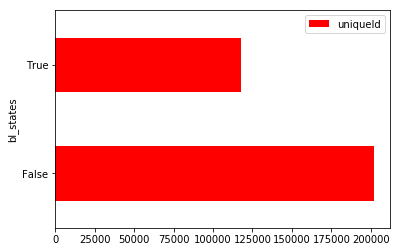

In [57]:
# plot simple success
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

plt.figure(); 
bl_states_list.plot(kind='barh', color='r');

In [46]:
#looking at frequency of projects by currency
currency_list = df.groupby('currency ').count()
del currency_list['name ']
del currency_list['category ']
del currency_list['main_category ']
del currency_list['deadline ']
del currency_list['goal ']
del currency_list['launched ']
del currency_list['pledged ']
del currency_list['state ']
del currency_list['backers ']
del currency_list['country ']
del currency_list['bl_states']

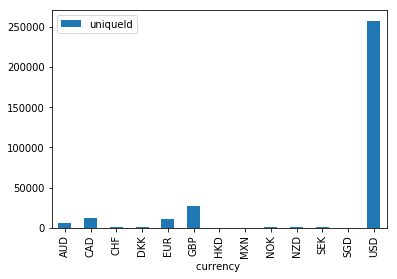

In [47]:
plt.figure(); 
currency_list.plot(kind='bar')

The 'currency' variable is interesting because it provides insight into the geographic distribution of Kickstarter projects. We found it more useful to look at this before the country variable because currency combines most of Europe into a single unit thus reducing the number of elements. Ultimately, the visualization implies that Kickstarter is dominated by English-speaking countries as four out of the top five currencies are from said nations (US, UK, Canada, and Australia). However, it should be noted that since the US dollar is used extensively internationally, it is worth examining the 'country' variable to see if the US is overrepresented in this visualization. 

In [48]:
#looking at frequency of projects by country
country_list = df.groupby('country ').count()
del country_list['name ']
del country_list['category ']
del country_list['main_category ']
del country_list['deadline ']
del country_list['goal ']
del country_list['launched ']
del country_list['pledged ']
del country_list['state ']
del country_list['backers ']
del country_list['currency ']
del country_list['bl_states']

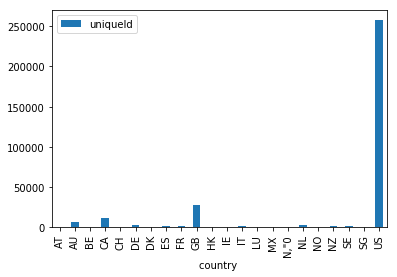

In [49]:
plt.figure(); 
country_list.plot(kind='bar')

This visualization provides further evidence in support of the results from the previous graph - Kickstarter projects are dominated by the English-speaking countries. However, it is important to note that this is only the case for the countries present in the dataset. We do not know why some countries were selected and others were not.

Regarding the US dollar's international appeal having a possible effect, there does not appear to be a significant difference when looking at number of projects by currency vs. country. 

In [50]:
#looking at the main categories for the projects
category_list = df.groupby('main_category ').count()
del category_list['name ']
del category_list['category ']
del category_list['state ']
del category_list['deadline ']
del category_list['currency ']
del category_list['goal ']
del category_list['launched ']
del category_list['pledged ']
del category_list['backers ']
del category_list['country ']
del category_list['bl_states']

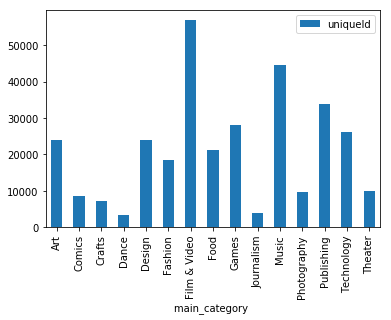

In [51]:
plt.figure(); 
category_list.plot(kind='bar')

The frequency chart for the 'main_categories' variable shows a good variety of different types of projects. It seems like Kickstarter has a lot of projects for creative pursuits. The three largest categories are Film & Video, Music, and Publishing. The only category that isn't really considered a creative pursuit would be the Technology category. 

In [52]:
#looking at projects based upon state of success
state_list = df.groupby('state ').count()
del state_list['name ']
del state_list['category ']
del state_list['main_category ']
del state_list['deadline ']
del state_list['currency ']
del state_list['goal ']
del state_list['launched ']
del state_list['pledged ']
del state_list['backers ']
del state_list['country ']
del state_list['bl_states']

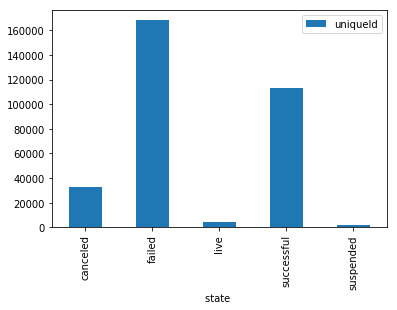

In [53]:
plt.figure(); 
state_list.plot(kind='bar')

The 'state' variable is a critical metric for success - it basically represents the situation where the value for 'pledged' is greater than the value for 'goal'. The visualization reveals that even though over half of the projects failed, about a third of the projects were successful. Furthermore, canceled projects is a significant minority of the total number of projects. Finally, live projects and suspended projects both comprise a tiny fraction of the total. 

## Visualize Relationships Between Attributes:

In [54]:
#looking at the relationship between success and fundraising goal
mean_by_state = df.groupby(['state ']).mean()
mean_by_state_goal = mean_by_state['goal ']

state 
canceled       88007.605265
failed         63484.142409
live           64116.569783
successful      9624.572525
suspended     217609.439783
Name: goal , dtype: float64


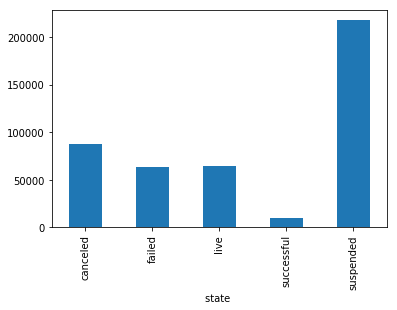

In [55]:
plt.figure(); 
mean_by_state_goal.plot(kind='bar')
print(mean_by_state_goal)

Logically, it makes sense that the lower you set your goal, the easier it is to meet. That is why we decided to start our investigation here. It is clear from the above graph that there is an inverse relationship between the success of a project and the fundraising goal. In other words, a project is more likely to succeed if it sets a lower fundraising goal. A successful project has an average goal of 9,624 while a failed project has an average goal of 63,484. However, because the average is affected by outliers, it is worth examining the spread of the values for the various states of success.

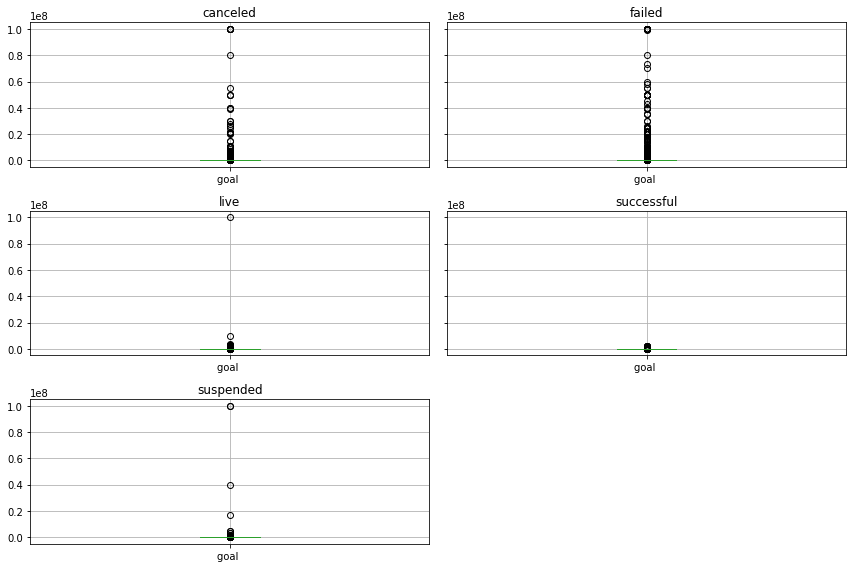

In [56]:
df.groupby(['state ']).boxplot(column=['goal '], figsize=(12,8))
plt.tight_layout()

The boxplots show that there are some extreme outliers that really impact the averages for outcomes that are not success. In fact, the success outcome is the only one out of the five that has no significant outliers. 

In [21]:
#looking at the relationship between success and the number of backers a project has
mean_by_state = df.groupby(['state ']).mean()
mean_by_state_backers = mean_by_state['backers ']

state 
canceled       25.182484
failed         16.771230
live           80.330172
successful    253.624322
suspended     113.930311
Name: backers , dtype: float64


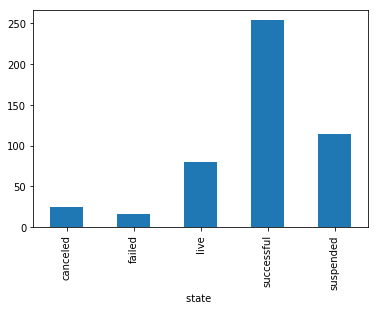

In [4]:
plt.figure(); 
mean_by_state_backers.plot(kind='bar')
print(mean_by_state_backers)

The next relationship we wanted to examine was the effect of number of backers on the success of the project. The graph provides evidence that successful projects have more backers which is what we expected. However, like in the previous relationship, we need to be careful of outliers. 

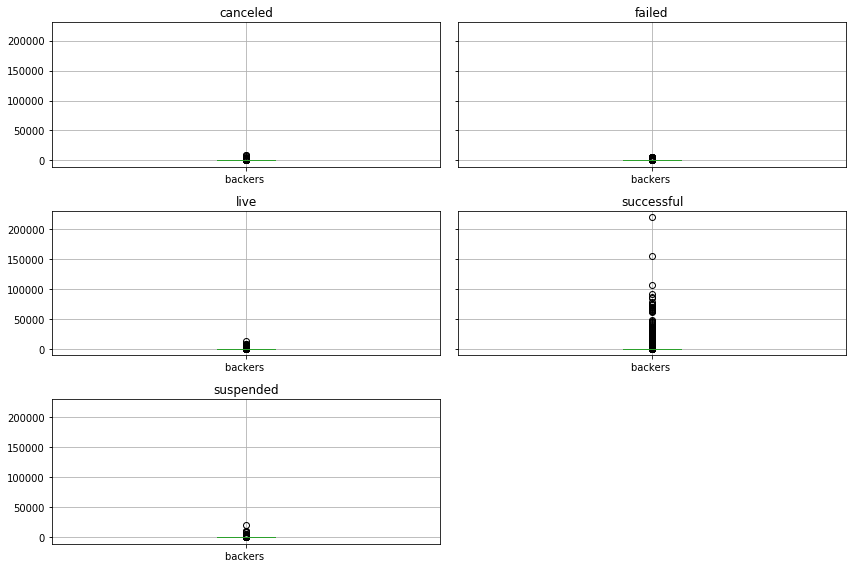

In [23]:
df.groupby(['state ']).boxplot(column=['backers '], figsize=(12,8))
plt.tight_layout()

The boxplots show that successful projects have a lot of variability regarding the number of backers. This makes sense as some projects will only attract the minimum number of backers needed to raise enough money while the projects that succeed far beyond expectations are more likely to have thousands of backers. Furthermore, it is highly unlikely that a failed project will attract a large number of backers since the number of backers is related to a project's success. 

In [31]:
#looking at the relationship between backers and category
by_category = df.groupby(['main_category ']).mean()
by_category = by_category['backers ']

main_category 
Art              39.444194
Comics          134.231728
Crafts           26.949735
Dance            43.245328
Design          237.516679
Fashion          62.275695
Film & Video     67.474449
Food             54.366733
Games           324.164976
Journalism       38.332514
Music            53.934183
Photography      37.368830
Publishing       53.019521
Technology      165.733658
Theater          47.422892
Name: backers , dtype: float64


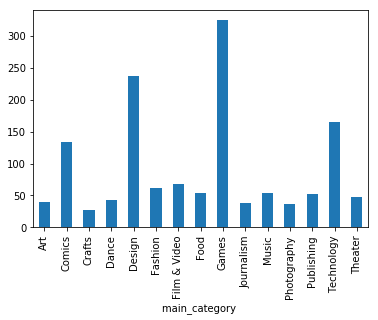

In [32]:
plt.figure(); 
by_category.plot(kind='bar')
print(by_category)

Another relationship that we wanted to look at was the popularity of the categories which can be measured by the average number of backers for a project in said category. The categories that had the highest number of backers on average were Games, Design, and Technology. It is also interesting Film & Video, Music, and Publishing had the largest number of products, but are average regarding the average number of backers. 

In [34]:
#looking at the relationship between amount pledged and country
by_country = df.groupby(['country ']).mean()
by_country = by_country['pledged ']

country 
AT       9952.875915
AU       6539.322473
BE       6101.848632
CA       7343.379632
CH      11320.132489
DE       7841.622414
DK      39867.797430
ES       4287.385007
FR      10338.749995
GB       4451.430196
HK      71812.480722
IE       4303.505043
IT       4546.475686
LU       3498.767500
MX      18214.613972
N,"0    14294.195489
NL       6075.453603
NO      27384.302471
NZ       6043.600370
SE      47688.887967
SG      13367.732101
US       9076.312240
Name: pledged , dtype: float64


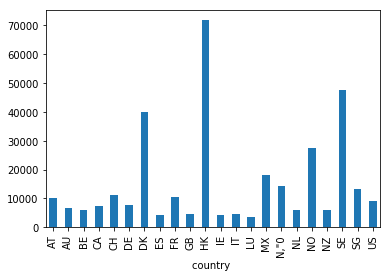

In [33]:
plt.figure(); 
by_country.plot(kind='bar')
print(by_country)

The last relationship that we looked at was between the average amount pledged per project and the country. The countries with the highest averages are Hong Kong, Denmark, Sweden, and Norway. Therefore, if someone wanted to maximize their chances of raising money through Kickstarter, starting a project in these countries would make the most sense. As before, these are averages, so we want to expand our knowledge of what is going on by looking at variability between countries. 

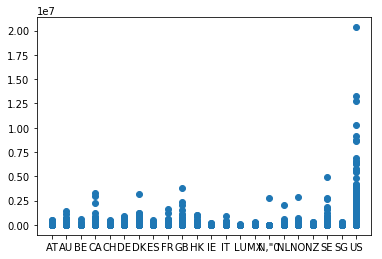

In [39]:
plt.scatter(df['country '], df['pledged '])
plt.show()

The reason we used a scatterplot as opposed to a boxplot to look at variability is due to the number of elements we are observing. We felt that there were too many countries for a boxplot to be effective in making comparisons. While we did lose some information by switching to a scatterplot, we felt that it was simply far easier to use. 

However, it still reveals some interesting things. Most notably, the US has some projects that have raised a ridiculous amount of money. Some other notable countries with very successful projects are Canada, Denmark, UK, and Sweden. Based on this graph and the previous one, it seems like Denmark and Sweden would be great places to raise money through Kickstarter. 

## Interesting Relationships:

There were two features in this dataset that were of particular interest. 

The first feature is the popularity of a project based upon it category and measured by the average number of backers. The three most popular categories for Kickstarter projects were Games, Design, and Technology. Since the number of backers is related to how successful your project is, it makes sense to use Kickstarter if you are trying to raise money for a project in one of these categories. 

The second interesting feature is the average amount pledged to a project by country. Sweden and Denmark both had high averages as well as a few high outliers meaning they are reliable places to raise money. The United States, while having a low average, had some extremely high outliers meaning that there is a higher chance of failure but also the chance of making it big. 

## Other Features:

One feature that could be interesting to investigate (as well as being one that we can add) is the difference between a person's goal and how much money they managed to raise. This would allow us to look at the degree of failure/success thus providing greater intsight into what kind of projects are worth pursuing. 

Another feature that we could add would be how fast a project reaches its goal from the moment of its inception. This could provide another measure of popularity since popular things tend to catch on quickly. Ultimately, any measurement that would help us predict whether or not a project will be successful would be worth adding.  

## Attempt at PCA:

An attempt to run PCA was made however due to time constraint, process was not completed and we did not feel like we had anything substantial to show at this point.